Combining Stimuli in NRV
========================

This example shows how logical and arithmetical operations on [NRV's stimulus](../../usersguide/stimuli.rst) object can facilitate the creation of complex stimulus.

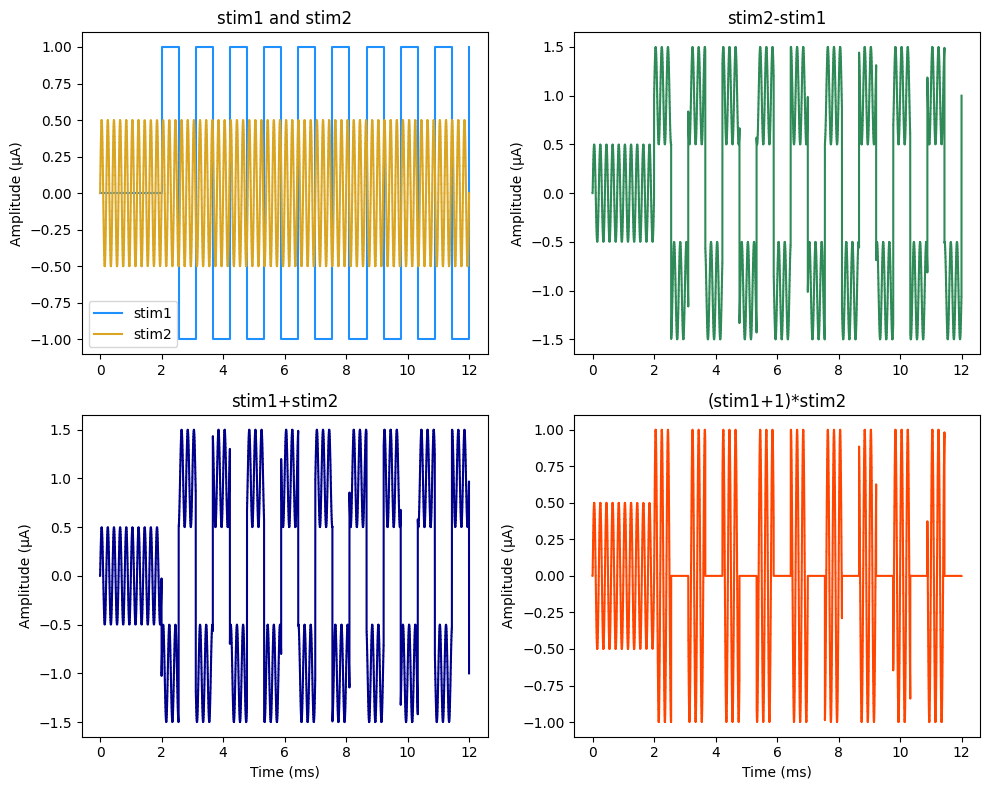

In [1]:
import sys
sys.path.append("../")
import nrv
import matplotlib.pyplot as plt
from numpy import exp


#####################################
# Example of combination of stimuli #
#####################################
stim1, stim2 = nrv.stimulus(), nrv.stimulus()

# stim1 parameters
t_start = 2
duration = 10
amp1 = 1
f_stim1 = 1
stim1.square(t_start, duration, amp1, f_stim1, 0, 0.5)
# stim2 parameters
f_stim2 = 5
amp2 = 0.5
stim2.sinus(0, t_start+duration, amp2, f_stim2)

# computations with +,-,*
stim3 = stim1 + stim2
stim4 = stim2 - stim1
stim5 = (stim1 + 1) * stim2

#print(dir(biphasic_stim))

fig, axs = plt.subplots(2, 2, layout='constrained', figsize=(10, 8))
stim1.plot(axs[0,0], label='stim1',color = "dodgerblue")
stim2.plot(axs[0,0], label='stim2',color = "goldenrod")
stim3.plot(axs[0,1], label='stim1+stim2',color = "seagreen")
stim4.plot(axs[1,0], label='stim2-stim1',color = "darkblue")
stim5.plot(axs[1,1], label='(stim1+1)*stim2',color = "orangered")

axs[0,0].legend()
axs[0,0].set_title("stim1 and stim2")
axs[1,0].set_title("stim1+stim2")
axs[0,1].set_title("stim2-stim1")
axs[1,1].set_title("(stim1+1)*stim2")

axs[0,0].set_ylabel('Amplitude (µA)')
axs[0,1].set_ylabel('Amplitude (µA)')
axs[1,0].set_ylabel('Amplitude (µA)')
axs[1,1].set_ylabel('Amplitude (µA)')

axs[1,0].set_xlabel('Time (ms)')
axs[1,1].set_xlabel('Time (ms)')
fig.tight_layout()





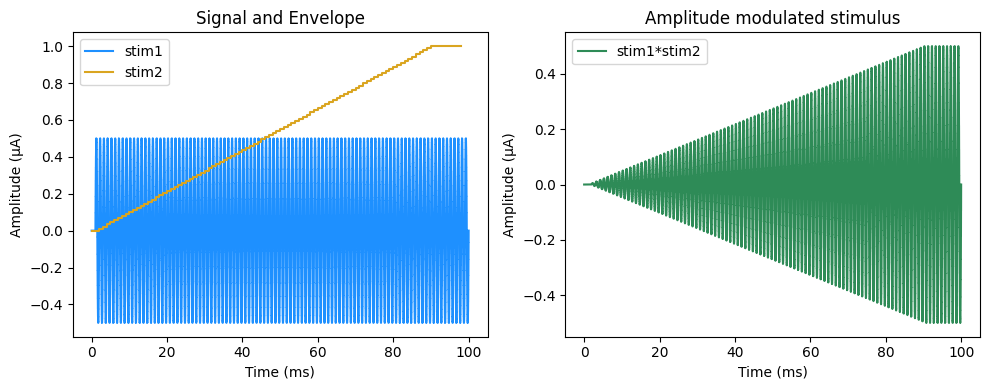

In [2]:
###################################
# Example of amplitude modulation #
###################################
stim1, stim2 = nrv.stimulus(), nrv.stimulus()

f_stim = 1
t_start = 1
duration = 99
amp = 0.5

t_ramp_stop = 90
amp_start = 0
amp_max = 1

stim1.sinus(t_start, duration, amp, f_stim)
stim2.ramp_lim(t_start, t_ramp_stop, amp_start, amp_max, duration, dt=1)

stim3 = stim1*stim2
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(10, 4))

stim1.plot(axs[0],label = 'stim1',color = "dodgerblue")
stim2.plot(axs[0],label = 'stim2',color = "goldenrod")

axs[0].set_title('Signal and Envelope')
stim3.plot(axs[1],label = 'stim1*stim2',color = "seagreen")
axs[1].set_title('Amplitude modulated stimulus')

axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Amplitude (µA)')
axs[1].set_xlabel('Time (ms)')
axs[1].set_ylabel('Amplitude (µA)')
axs[0].legend()
axs[1].legend()
fig.tight_layout()

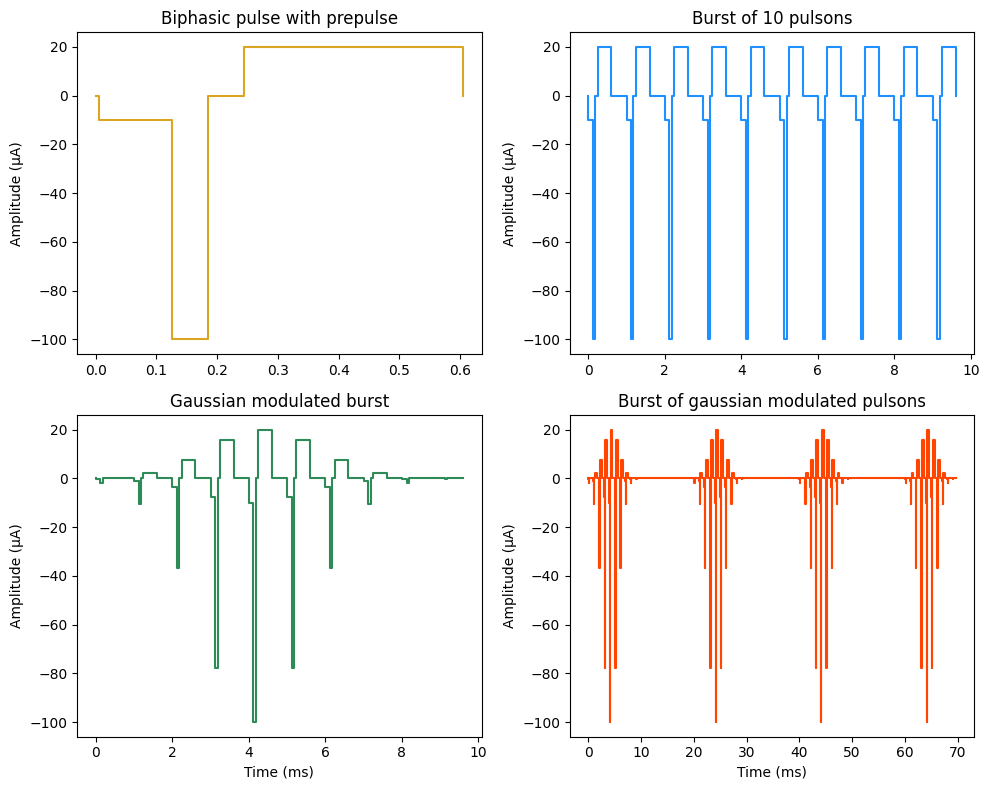

In [3]:
#################################################
## Example of a complex custom stimulus design ##
##                                             ##
## simple pulse with a prepulse and charge     ##
## balance                                     ##
## modulation with a gaussian of borst of 10   ##
## patterns                                    ##
## repetition of the bursts                    ##
#################################################

start = 5e-3
fig, axs = plt.subplots(2, 2, layout='constrained', figsize=(10, 8))

# waveform parameters
complex_stim = nrv.stimulus()
prepulse_amp = -10              # in uA
t_prepulse = 120e-3             # in ms
cath_amp = -100                 # in uA
t_cath = 60e-3                  # in ms
deadtime = 60e-3                # in ms
an_amp = 20                     # in uA
# prepulse and cathodic pulse
complex_stim.pulse(start, prepulse_amp)
complex_stim.pulse(start + t_prepulse, cath_amp, t_cath)
complex_stim.s[-1] = 0
# compute the balancing time and anodic pulse
an_duration = abs(prepulse_amp*t_prepulse + cath_amp*t_cath)/an_amp
complex_stim.pulse(complex_stim.t[-1] + deadtime, an_amp, an_duration)
# plot the pattern
complex_stim.plot(axs[0, 0],color = "goldenrod")
axs[0, 0].set_title('Biphasic pulse with prepulse')
#axs[0, 0].set_xlabel('Time (ms)')
axs[0, 0].set_ylabel('Amplitude (µA)')

# create burst of 10 patterns
freq = 1.                       # in kHz
# finish the period
t_blank = 1/freq - (start + t_prepulse + t_cath + deadtime + an_duration)
N_patterns = 10
s_pattern, t_pattern = complex_stim.s, complex_stim.t
for i in range(N_patterns-1):
    complex_stim.concatenate(s_pattern, t_pattern, t_shift=t_blank)
# plot the pattern
complex_stim.plot(axs[0, 1],color = "dodgerblue")
axs[0, 1].set_title('Burst of 10 pulsons')
#axs[0, 1].set_xlabel('Time (ms)')
axs[0, 1].set_ylabel('Amplitude (µA)')

# modulate with gaussian envelope
def my_gaussian(t, f, N_patterns):
    return exp(-((t - ((N_patterns/2)-1)*(1/f))**2)/4)


envelope = nrv.stimulus()
for k in range(N_patterns):
    envelope.pulse(k*(1/freq), my_gaussian(k*(1/freq), freq, N_patterns))

modulated_pattern = complex_stim * envelope
modulated_pattern.plot(axs[1,0],color = "seagreen")
axs[1, 0].set_title('Gaussian modulated burst')
axs[1, 0].set_xlabel('Time (ms)')
axs[1, 0].set_ylabel('Amplitude (µA)')

# construct repeted groups of burst
N_burst = 4
f_burst = 0.05
s_burst, t_burst = modulated_pattern.s, modulated_pattern.t
t_blank = 1/f_burst - modulated_pattern.t[-1]
for i in range(N_burst-1):
    modulated_pattern.concatenate(s_burst, t_burst, t_shift=t_blank)
modulated_pattern.plot(axs[1,1],color ="orangered")
axs[1, 1].set_title('Burst of gaussian modulated pulsons')
axs[1, 1].set_xlabel('Time (ms)')
axs[1, 1].set_ylabel('Amplitude (µA)')
fig.tight_layout()

#plt.show()